<a href="https://colab.research.google.com/github/jsong920519/Data-Analysis-with-Open-Source/blob/main/%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import requests
import pandas as pd
import json

# 기본 URL (본인 인증키 그대로 사용)
url = "http://openapi.seoul.go.kr:8088/74537255746a793032307774485476/json/energyUseDataSummaryInfo/1/5/{}/{}"

table = []

for year in range(2015, 2025):
    for month in range(1, 13):
        new_month = f"{month:02d}"
        request_url = url.format(year, new_month)

        response = requests.get(request_url)
        if response.status_code == 200:
            data = response.json()

            if "energyUseDataSummaryInfo" in data and "row" in data["energyUseDataSummaryInfo"]:
                rows = data["energyUseDataSummaryInfo"]["row"]

                # 개인 유형 데이터만 선택
                personal = [r for r in rows if r["MM_TYPE"] == "개인"]

                if personal:
                    print("API 호출 성공 - 개인 유형의 상위 5개 데이터 확인:")
                    for r in personal[:5]:
                        print({
                            "YEAR": r["YEAR"],
                            "MON": r["MON"],
                            "EUS": r["EUS"],  # 전기
                            "GUS": r["GUS"],  # 가스
                            "WUS": r["WUS"],  # 수도
                            "HUS": r["HUS"]   # 지역난방
                        })
            else:
                print("데이터 없음")
        else:
            print("API 호출 실패")

df = pd.DataFrame(table)

df['MON'] = df['MON'].astype(int)
df.loc[(df['MON'] >= 3) & (df['MON'] <= 5), 'season'] = '봄'
df.loc[(df['MON'] >= 6) & (df['MON'] <= 8), 'season'] = '여름'
df.loc[(df['MON'] >= 9) & (df['MON'] <= 11), 'season'] = '가을'
df.loc[(df['MON'] == 12) | (df['MON'] <= 2), 'season'] = '겨울'
print(df[['year', 'MON', 'season']].head(12))

API 호출 성공 - 개인 유형의 상위 5개 데이터 확인:
{'YEAR': '2015', 'MON': '01', 'EUS': '193784708', 'GUS': '59133720', 'WUS': '12819757.886', 'HUS': '22740838.937'}
API 호출 성공 - 개인 유형의 상위 5개 데이터 확인:
{'YEAR': '2015', 'MON': '02', 'EUS': '189974230', 'GUS': '56487358', 'WUS': '12656888.218', 'HUS': '18793320.213'}
API 호출 성공 - 개인 유형의 상위 5개 데이터 확인:
{'YEAR': '2015', 'MON': '05', 'EUS': '177289769', 'GUS': '22060892', 'WUS': '13086734.214', 'HUS': '1320895.801'}
API 호출 성공 - 개인 유형의 상위 5개 데이터 확인:
{'YEAR': '2015', 'MON': '06', 'EUS': '186073153', 'GUS': '12677645', 'WUS': '14241651.402', 'HUS': '294312.634'}
API 호출 성공 - 개인 유형의 상위 5개 데이터 확인:
{'YEAR': '2015', 'MON': '07', 'EUS': '165114568', 'GUS': '8893640', 'WUS': '12083879.038', 'HUS': '702863.645'}
API 호출 성공 - 개인 유형의 상위 5개 데이터 확인:
{'YEAR': '2015', 'MON': '08', 'EUS': '242000479', 'GUS': '7619018', 'WUS': '15164553.742', 'HUS': '460288.965'}
API 호출 성공 - 개인 유형의 상위 5개 데이터 확인:
{'YEAR': '2015', 'MON': '10', 'EUS': '186473958', 'GUS': '8924018', 'WUS': '14711828.766

KeyError: 'MON'

    YEAR  MON        EUS       GUS           WUS           HUS  season
0   2015    1  193784708  59133720  12819757.886  22740838.937  Winter
1   2015    2  189974230  56487358  12656888.218  18793320.213  Winter
2   2015    5  177289769  22060892  13086734.214   1320895.801  Spring
3   2015    6  186073153  12677645  14241651.402    294312.634  Summer
4   2015    7  165114568   8893640  12083879.038    702863.645  Summer
..   ...  ...        ...       ...           ...           ...     ...
78  2024    8  463971328   7072251    15873544.6    130082.263  Summer
79  2024    9  409872908   5729131    15143321.6   3420507.136    Fall
80  2024   10  282268119   8233421    15297669.9   2695491.396    Fall
81  2024   11  257927956  17418221    14678672.5   8836296.454    Fall
82  2024   12  134828126  42103424     7326853.6   1513199.277  Winter

[83 rows x 7 columns]


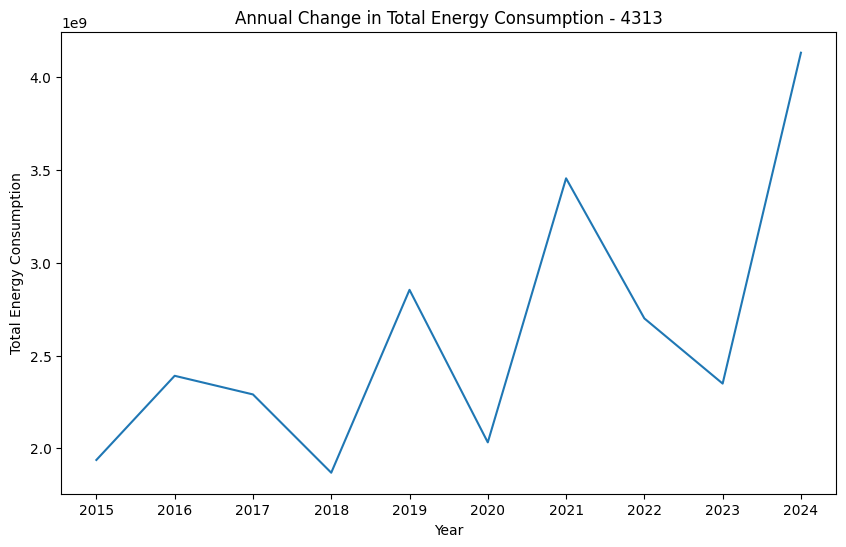

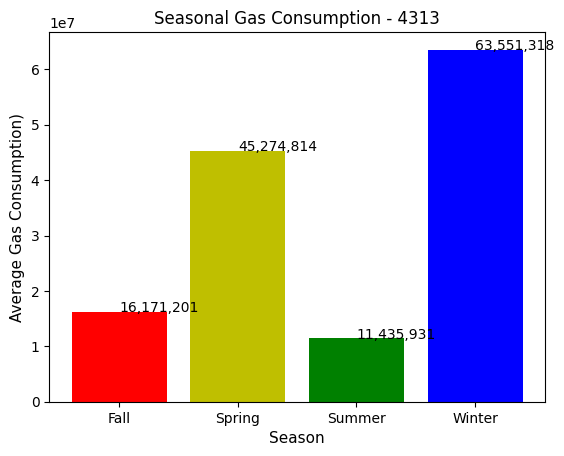

In [16]:
import requests
import json
import pandas as pd
# 기본 URL (본인 인증키 그대로 사용)
url = "http://openapi.seoul.go.kr:8088/74537255746a793032307774485476/json/energyUseDataSummaryInfo/1/5/{}/{}"

table = []

for year in range(2015, 2025):
    for month in range(1, 13):
        new_month = f"{month:02d}"
        request_url = url.format(year, new_month)

        response = requests.get(request_url)
        if response.status_code == 200:
            try:
                data = response.json()
            except json.JSONDecodeError:
                continue

            # 데이터가 존재하는지 확인
            if "energyUseDataSummaryInfo" in data and "row" in data["energyUseDataSummaryInfo"]:
                rows = data["energyUseDataSummaryInfo"]["row"]

                # 데이터 수집: 개인 유형만 필터링하여 table에 추가
                for r in rows:
                    if r["MM_TYPE"] == "개인":
                        record = {
                            "YEAR": r["YEAR"],
                            "MON": r["MON"],
                            "EUS": r["EUS"],   # 전기
                            "GUS": r["GUS"],   # 가스
                            "WUS": r["WUS"],   # 수도
                            "HUS": r["HUS"]    # 지역난방
                        }
                        table.append(record)


df = pd.DataFrame(table)



df["MON"] = df["MON"].astype(int)
df.loc[(df['MON'] >= 3) & (df['MON'] <= 5), 'season'] = 'Spring'
df.loc[(df['MON'] >= 6) & (df['MON'] <= 8), 'season'] = 'Summer'
df.loc[(df['MON'] >= 9) & (df['MON'] <= 11), 'season'] = 'Fall'
df.loc[(df['MON'] == 12) | (df['MON'] <= 2), 'season'] = 'Winter'

print(df)

import matplotlib.pyplot as plt
df['EUS'] = df['EUS'].astype(float)
df['GUS'] = df['GUS'].astype(float)
df['WUS'] = df['WUS'].astype(float)
df['HUS'] = df['HUS'].astype(float)
df['Total'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
annual_total = df.groupby('YEAR')['Total'].sum()
plt.figure(figsize=(10, 6))

plt.plot(annual_total.index, annual_total.values)

plt.title("Annual Change in Total Energy Consumption - 4313")
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')

plt.show()



df['GUS'] = df['GUS'].astype(float)
season_gas = df.groupby('season')['GUS'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure()
bars = plt.bar(season_gas['season'], season_gas['GUS'], color=['r', 'y', 'g', 'b'])


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}')

plt.title("Seasonal Gas Consumption - 4313")
plt.xlabel('Season', fontsize=11)
plt.ylabel('Average Gas Consumption)', fontsize=11)
plt.show()



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

##chpater 3 폴더 다운받고 압축 풀고 올리기.
## data.csv 파일 읽기
df = pd.read_csv('data.csv')
print(df)

df1 = pd.read_csv('data.csv', encoding ="utf-8",sep=',',
                  header=0, index_col=None, skiprows = None, nrows=None)
print(df1)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6
           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 dataframe 읽기
df = pd.read_json('data.json')
print(df,'\n')

df2 = pd.read_json('data.json', orient='records', encoding = 'utf-8',
                  lines=False)
print(df2, '\n')
## data.json 파일 출력
with open('data.json', mode='r') as f:
    df1 = json.load(f)
print(df1, '\n')

with open('data.json', mode='r', encoding = 'utf-8') as f:
    data=json.load(f)
print(data)

                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,... 

                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,... 

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]} 

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}


## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
## regular library 불러오
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성, 앞에 6자리를 그룹1로, 뒤 7자리를 그룹2로.
pattern = re.compile(r'(\d{6})-(\d{7})')
## 주민등록번호 마스킹. substitution.
masked_content = pattern.sub(r'\1-*******',content)
## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log', mode = 'w') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params=params)
    ##에러고치기
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()
    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']
     ['temperature_2m'], data['current_units']['temperature_2m']))
    fstring = f'서울시 종로구의 현재 온도는 : {data['current']['temperature_2m']} {data['current_units']['temperature_2m']} 입니다.'
    print(fstring)
except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.026345252990722656, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-10-01T04:00', 'interval': 900, 'temperature_2m': 23.6}}
서울시 종로구의 현재 온도는 : 23.6°C 입니다.
서울시 종로구의 현재 온도는 : 23.6 °C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  114M  100  114M    0     0   263M      0 --:--:-- --:--:-- --:--:--  263M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.9 MB/131 MB of archives.
After this operation, 448 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 /content/google-chrome-stable_current_amd64.deb google-chrome-stable amd64 141.0.7390.54-1 [121 MB]
Get:3 http://ar

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
driver.get(url)
## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)
## 드라이버 종료
driver.quit()

['\n\t\tAlert \n\t\t\n\t']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정, parameter는 공공데이터 요청변수 페이지에서 제공됨.
url = 'http://'
api_key = ''

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params = params)
## 호출 성공/실패 출력
print(response.json())
